#This is for 1st trial of Watch data

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 22:12:32 2019

@author: Pias Tanmoy
"""



from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
import pandas as pd
from keras.callbacks import ModelCheckpoint


N_EPOCH = 10
BATCH_SIZE = 5
VERBOSE = 1
N_CLASS = 10
OPTIMIZER = Adam()
N_HIDDEN_1 = 128
VALIDATION_SPLIT = 0.1
RESHAPE = 784
DROPOUT = 0.1


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
Train = pd.read_csv('drive/My Drive/Google_Colab/HAR_Male_Female/watch_sensorData_new/f_Anika_180_01_1906251407.csv')
print(Train.shape)

(6406, 6)


In [0]:
import os
import glob
import pandas as pd
os.chdir("drive/My Drive/Google_Colab/HAR_Male_Female/watch_sensorData_new")


In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [10]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
print(combined_csv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


      -0.0036633  -0.0061056  -0.0073267  ...  9.7029  9.9924  9.9996
0            NaN         NaN         NaN  ...     NaN     NaN     NaN
1            NaN         NaN         NaN  ...     NaN     NaN     NaN
2            NaN         NaN         NaN  ...     NaN     NaN     NaN
3            NaN         NaN         NaN  ...     NaN     NaN     NaN
4            NaN         NaN         NaN  ...     NaN     NaN     NaN
5            NaN         NaN         NaN  ...     NaN     NaN     NaN
6            NaN         NaN         NaN  ...     NaN     NaN     NaN
7            NaN         NaN         NaN  ...     NaN     NaN     NaN
8            NaN         NaN         NaN  ...     NaN     NaN     NaN
9            NaN         NaN         NaN  ...     NaN     NaN     NaN
10           NaN         NaN         NaN  ...     NaN     NaN     NaN
11           NaN         NaN         NaN  ...     NaN     NaN     NaN
12           NaN         NaN         NaN  ...     NaN     NaN     NaN
13           NaN    

In [0]:
#content/drive/My Drive/Google_Colab/HAR_Male_Female/watch_sensorData_new/f_Anika_180_01_1906251407.csv
Train = pd.read_csv('drive/My Drive/Google_Colab/HAR_Male_Female/watch_sensorData_new/f_Anika_180_01_1906251407.csv')
Train = np.array(Train)
Train = shuffle(Train)

X_train = Train[:, :6]
y_train = Train[:, 6:7]

y_train = y_train.astype('int')


INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = np.unique(y_train).shape[0]
N_CLASS = OUTPUT_DIM

print(INPUT_DIM, OUTPUT_DIM)

6 2


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)




In [0]:
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta

def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 500, activation='relu', kernel_initializer='glorot_uniform', input_dim=INPUT_DIM))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 100, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 200, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 50, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])
  model = classifier
  
  return model

In [0]:
model = create_model()
BATCH_SIZE = 10
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, 
                    epochs = 100, verbose = VERBOSE, 
                    validation_split=VALIDATION_SPLIT,
                    shuffle = True)

Train on 45778 samples, validate on 5087 samples
Epoch 1/100
45778/45778 [==============================] - 12s 270us/step - loss: 0.2281 - acc: 0.9167 - val_loss: 0.2160 - val_acc: 0.9235
Epoch 2/100
45778/45778 [==============================] - 12s 263us/step - loss: 0.1838 - acc: 0.9324 - val_loss: 0.1652 - val_acc: 0.9391
Epoch 3/100
45778/45778 [==============================] - 12s 264us/step - loss: 0.1639 - acc: 0.9395 - val_loss: 0.1524 - val_acc: 0.9408
Epoch 4/100
45778/45778 [==============================] - 12s 263us/step - loss: 0.1513 - acc: 0.9430 - val_loss: 0.1407 - val_acc: 0.9452
Epoch 5/100
45778/45778 [==============================] - 12s 262us/step - loss: 0.1381 - acc: 0.9465 - val_loss: 0.1335 - val_acc: 0.9465
Epoch 6/100
45778/45778 [==============================] - 12s 260us/step - loss: 0.1290 - acc: 0.9501 - val_loss: 0.1350 - val_acc: 0.9491
Epoch 7/100
45778/45778 [==============================] - 12s 267us/step - loss: 0.1243 - acc: 0.9518 - val_lo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


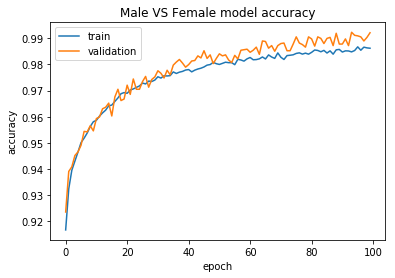

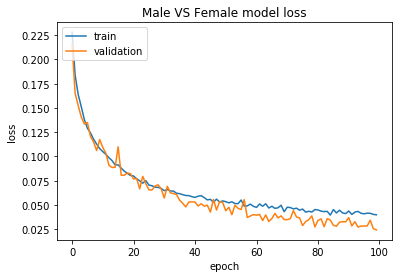

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Male VS Female model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Training_Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

#files.download( "Training_Accuracy.png" )

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Male VS Female model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

#files.download( "Training_loss.png" )

In [0]:
from google.colab import files
files.download( "Training_Accuracy.png" )
files.download( "Training_loss.png" )